# ERA5 Spatial Plots
This notebook serves to spatially visualize the mean state wind patterns from ERA5. This code was produced by Grace Woolslayer. Contact grace.woolslayer@temple.edu for questions.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr
from matplotlib.ticker import FormatStrFormatter
import cftime
import warnings

In [5]:
def south_pole_map(cols=1, rows=1, fig_size=(12,8), max_extent=-60, facecolor='white'):
    ''' 
    User note: In order to call the function, begin cell with: fig, ax = south_pole_map(**args).
    
    Neglecting "fig, ax =" at the begeinning will not map your data to the existing axes.
    
    This function sets up a polar projection centered at the South Pole, which DataArrays can be plotted over.
    
    Optional arguments accepted for figure size, maximum (northward) extent and facecolor. Any number of columns and/or rows are also accepted for multiple subplots.
    
    If creating multiple subplots, ax=ax[*index*] must be passed in the plot call for each array.
    
    By default, these are set to (12,8), -50ºS and gray, respectively. Columns/Rows set to 1 by default – specifying axes in which to plot data is not necessary when using default column number.
    '''
    import matplotlib.path as mpath
    import numpy as np
    import cartopy.crs as ccrs
    
    fig,ax = plt.subplots(figsize=fig_size, ncols=cols, nrows=rows, subplot_kw={'projection': ccrs.SouthPolarStereo(), 'facecolor':facecolor}, layout='constrained')

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    if rows>1 and cols>1:
        for i in range(rows):
            for j in range(cols):
                ax[i,j].set_boundary(circle, transform=ax[i,j].transAxes)

                # lat/long map extents. shows south pole out to 50ºS
                ax[i,j].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif cols>1 and rows==1:
        for i in range(cols):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif rows>1 and cols==1:
        for i in range(rows):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    else:
        ax.set_boundary(circle, transform=ax.transAxes)

            # lat/long map extents. shows south pole out to 50ºS
        ax.set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    
    
    #must return fig, ax when creating multiple subplots in a function
    return fig, ax

In [6]:
era5_u = xr.open_dataset('/home/pachamama/shared/ERA5/ERA5_monthly_averaged_data_on_single/monthly_averaged_reanalysis/wind/10m_u_wind_component.nc')
era5_v = xr.open_dataset('/home/pachamama/shared/ERA5/ERA5_monthly_averaged_data_on_single/monthly_averaged_reanalysis/wind/10m_v_wind_component.nc')

In [7]:
era_old = xr.open_dataset('/home/pachamama/shared/era5_10m_u_component_of_wind_1940-2024_monthly_ensemble.nc',
                         use_cftime=True)

In [8]:
era_old_95_2014 = era_old.u10.sel(time=slice('1995-01-01','2014-12-01'))

In [9]:
era_old_95_2014_mean = era_old_95_2014.mean(dim='time')

In [10]:
era5_u_ave = era5_u.u10.mean(dim='date').load()
era5_v_ave = era5_v.v10.mean(dim='date').load()

#era5_u_ave_95_04 = era5_u.u10.sel(date=slice( mean(dim='date')

In [11]:
era5_u_ave

<xarray.DataArray 'u10' (latitude: 721, longitude: 1440)>
array([[ 0.01955155,  0.01955155,  0.01955155, ...,  0.01955155,
         0.01955155,  0.01955155],
       [-0.6070643 , -0.6084035 , -0.60974973, ..., -0.60172397,
        -0.60350424, -0.6052856 ],
       [-0.6017201 , -0.60394835, -0.6064195 , ..., -0.5926511 ,
        -0.59616226, -0.59923834],
       ...,
       [-3.507844  , -3.4977274 , -3.4816213 , ..., -3.542835  ,
        -3.5276656 , -3.5156128 ],
       [-2.8504934 , -2.8401115 , -2.829726  , ..., -2.874331  ,
        -2.8664007 , -2.8584495 ],
       [ 1.2910174 ,  1.2910174 ,  1.2910174 , ...,  1.2910174 ,
         1.2910174 ,  1.2910174 ]], dtype=float32)
Coordinates:
    number     int64 0
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

In [10]:
#era5_u_ave = era5_u.u10.mean(dim='date').load()
#era5_v_ave = era5_v.v10.mean(dim='date').load()

era5_u_ave_95_04 = era5_u.u10.sel(date=slice('19950101','20141201'))
era5_u_ave_95_04_ave = era5_u_ave_95_04.mean(dim='date')

era5_v_ave_95_04 = era5_v.v10.sel(date=slice('19950101','20141201'))
era5_v_ave_95_04_ave = era5_v_ave_95_04.mean(dim='date')

In [11]:
speed_vector_ave = np.sqrt(era5_u_ave**2 + era5_v_ave**2)

In [12]:
speed = np.sqrt(era5_u.u10**2 + era5_v.v10**2)

In [13]:
speed

<xarray.DataArray (date: 1017, latitude: 721, longitude: 1440)>
array([[[3.1158442, 3.1158442, 3.1158442, ..., 3.1158442, 3.1158442,
         3.1158442],
        [3.269314 , 3.2690363, 3.2682064, ..., 3.2662132, 3.2674227,
         3.2680762],
        [3.3080301, 3.3080428, 3.307087 , ..., 3.3025818, 3.304487 ,
         3.305922 ],
        ...,
        [4.0611453, 4.062803 , 4.0630484, ..., 4.0493717, 4.0531797,
         4.0570803],
        [3.8613675, 3.8621674, 3.862573 , ..., 3.8525856, 3.8553221,
         3.8583338],
        [2.9526925, 2.9526925, 2.9526925, ..., 2.9526925, 2.9526925,
         2.9526925]],

       [[3.2449462, 3.2449462, 3.2449462, ..., 3.2449462, 3.2449462,
         3.2449462],
        [3.1725905, 3.1718402, 3.1707578, ..., 3.169474 , 3.1703382,
         3.1712198],
        [3.1741018, 3.1732986, 3.1720157, ..., 3.169593 , 3.1711469,
         3.1724453],
...
        [6.974197 , 6.9778423, 6.979717 , ..., 6.95155  , 6.9593387,
         6.966464 ],
        [6.6894207, 6.690979 , 6.692197 , ..., 6.6746063, 6.679712 ,
         6.684548 ],
        [5.258669 , 5.258669 , 5.258669 , ..., 5.258669 , 5.258669 ,
         5.258669 ]],

       [[1.8450788, 1.8450788, 1.8450788, ..., 1.8450788, 1.8450788,
         1.8450788],
        [2.001925 , 2.0009856, 2.0000577, ..., 2.0006545, 2.001214 ,
         2.0013437],
        [2.078556 , 2.0776865, 2.0766878, ..., 2.0755093, 2.0768259,
         2.0776937],
        ...,
        [6.3922186, 6.3953767, 6.396146 , ..., 6.3732276, 6.378958 ,
         6.385593 ],
        [6.0657763, 6.0667286, 6.0681324, ..., 6.0525   , 6.0569806,
         6.061231 ],
        [4.4821706, 4.4821706, 4.4821706, ..., 4.4821706, 4.4821706,
         4.4821706]]], dtype=float32)
Coordinates:
    number     int64 0
  * date       (date) int64 19400101 19400201 19400301 ... 20240801 20240901
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
    expver     (date) object '0001' '0001' '0001' ... '0001' '0001' '0005'

### uas component

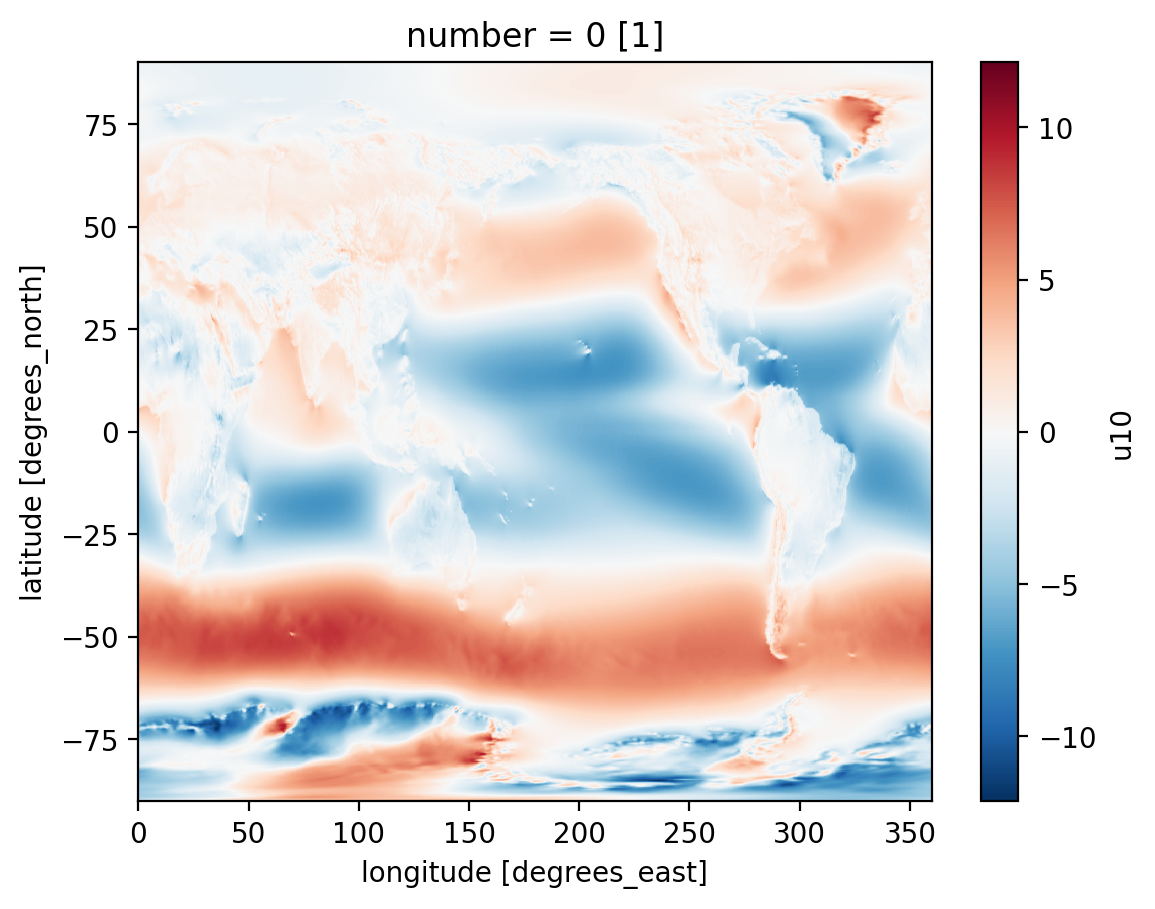

In [12]:
era5_u_ave.plot()

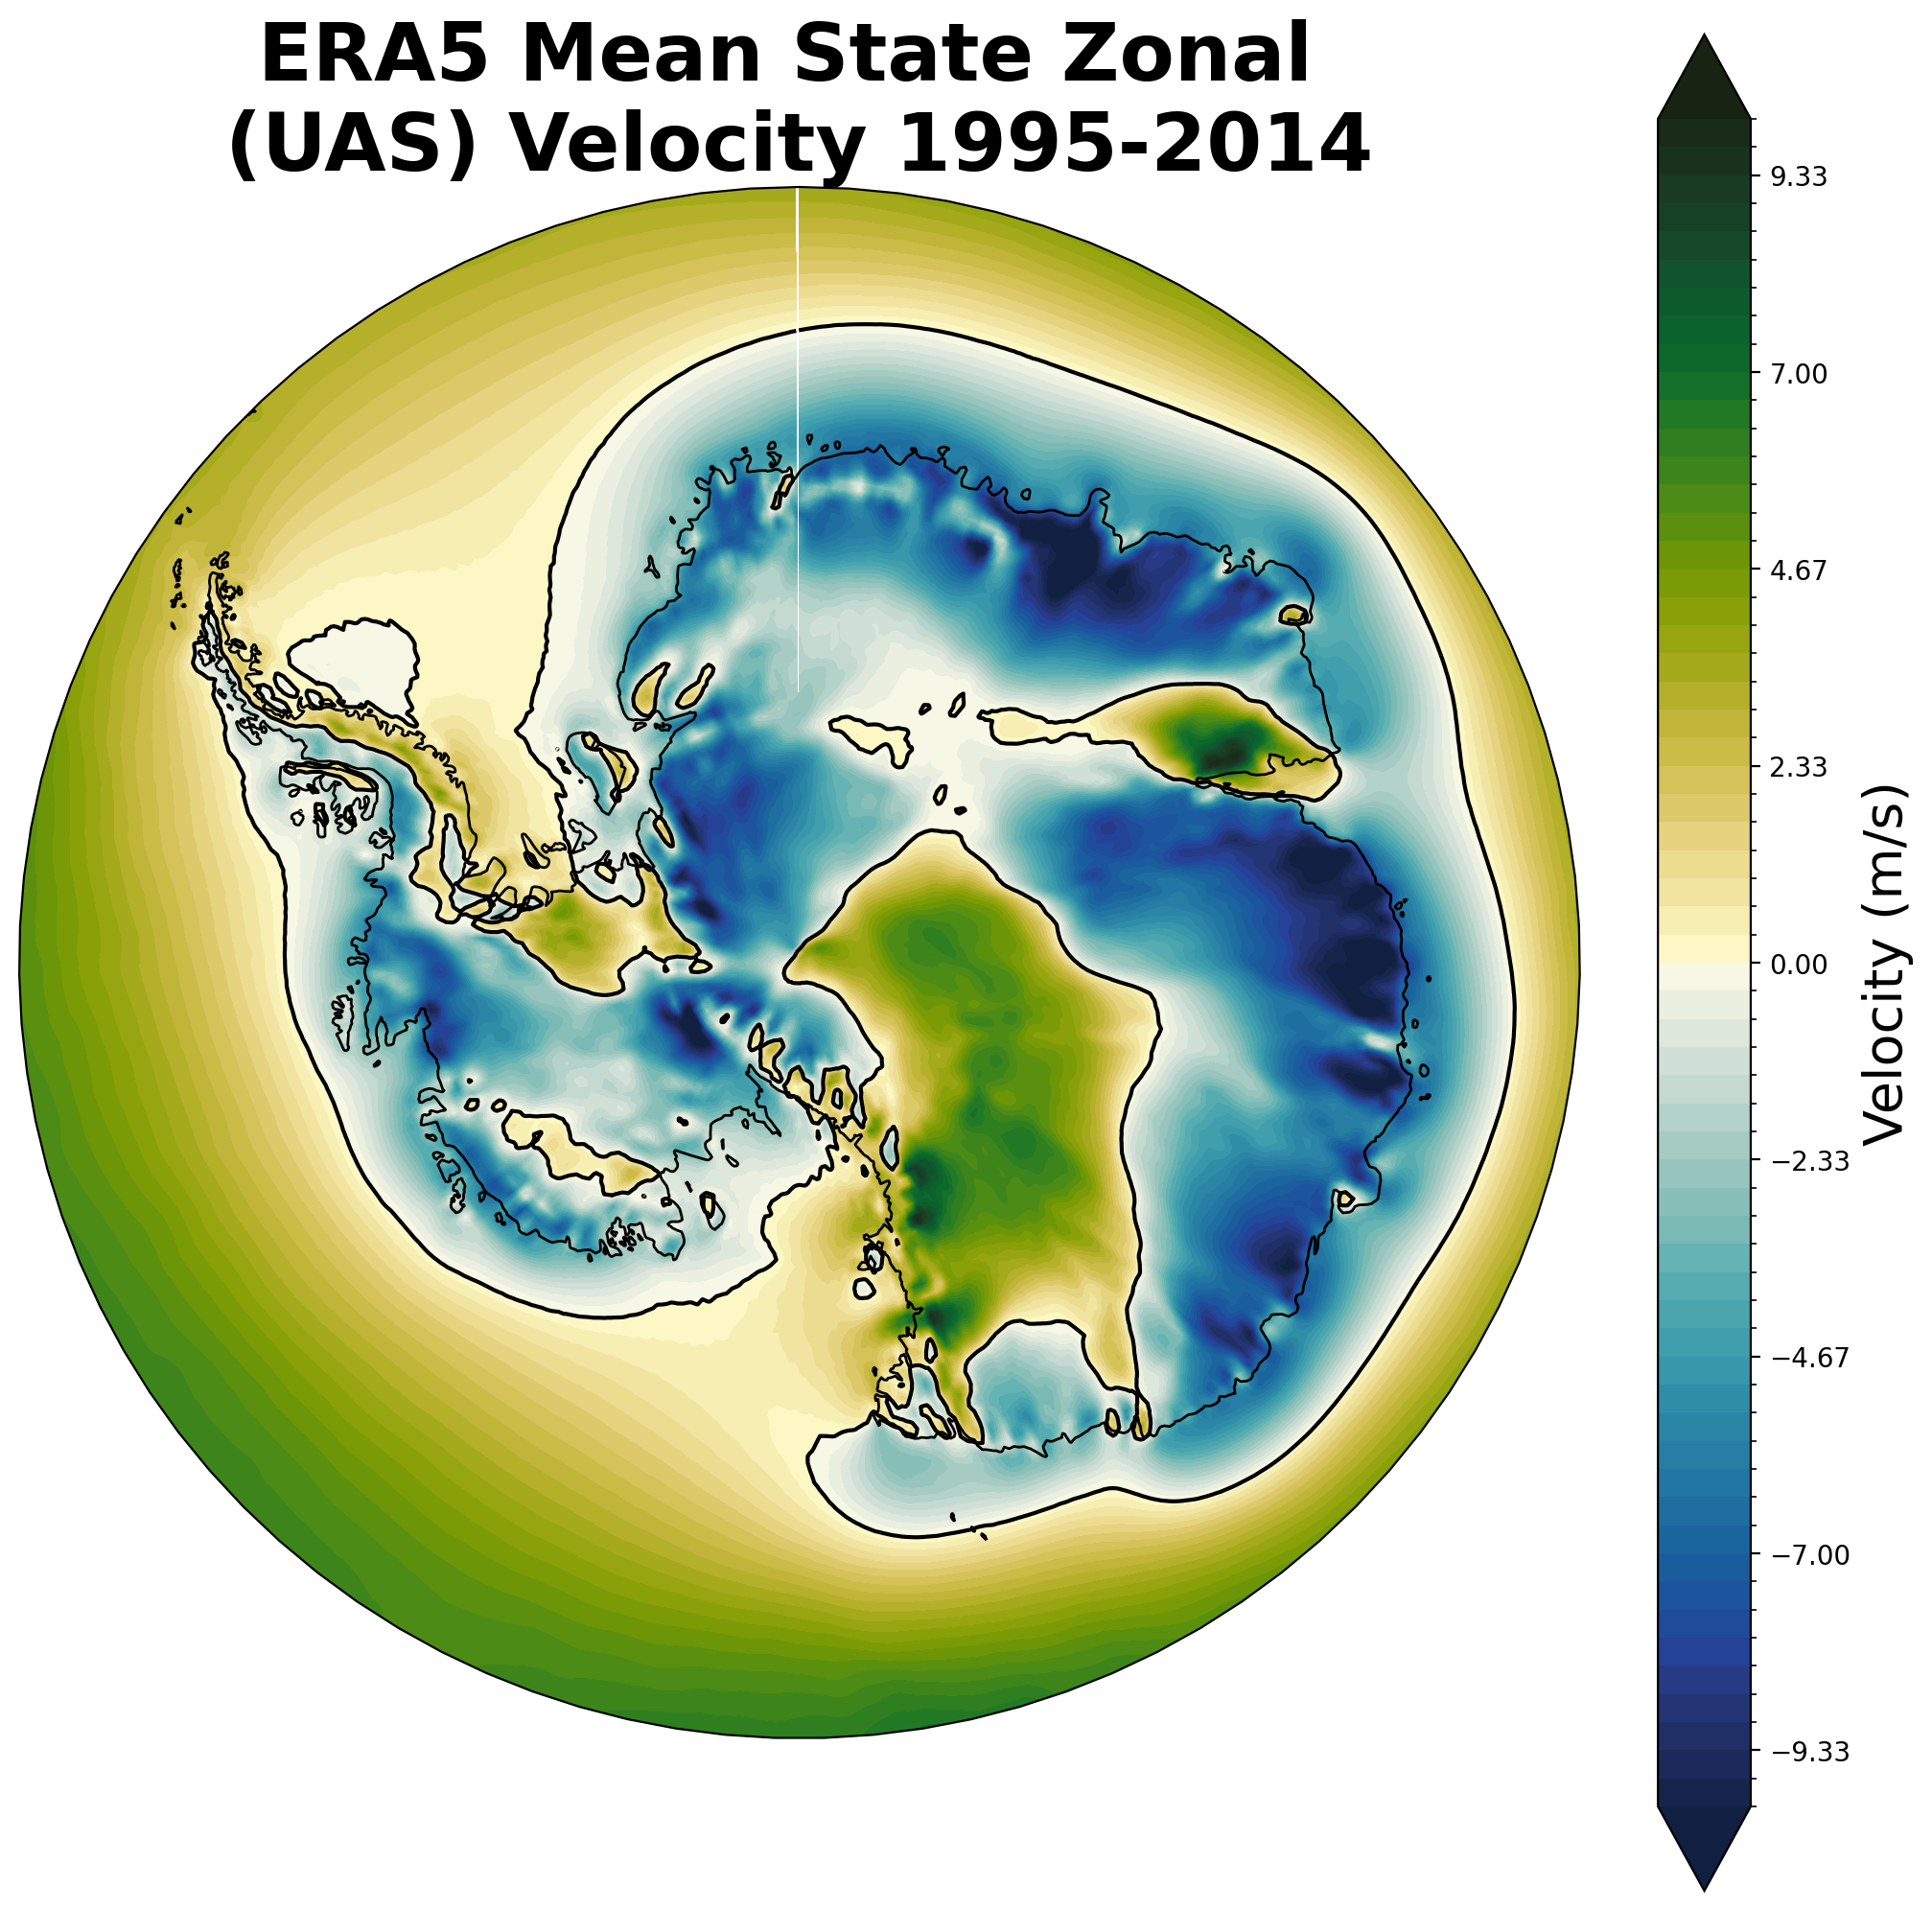

In [13]:
fig, ax = south_pole_map(rows=1, fig_size=(10, 10))

# Define the color map and levels
cmap =cmocean.cm.delta
vmin = -10
vmax = 10
levels = np.linspace(vmin, vmax, 61)  # 61 levels between vmin and vmax

p1=era5_u_ave.plot.contourf(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    vmin=vmin,
                                    vmax=vmax,
                                    levels=levels,
                                    extend='both',
                                    cmap=cmap, add_colorbar=False)

era5_u_ave.plot.contour(transform=ccrs.PlateCarree(),extend='both',levels=[0],colors='k')

# Add coastlines
ax.coastlines()

# Set titles
ax.set_title('ERA5 Mean State Zonal \n(UAS) Velocity 1995-2014', fontsize=30,fontweight='bold')

# Create a single color bar for all three subplots
cbar = fig.colorbar(p1,ax=ax, orientation='vertical', fraction=0.5, pad=0.05)
cbar.set_label('Velocity (m/s)', fontsize=20)  # Change this to your desired label

plt.show()

### vas component

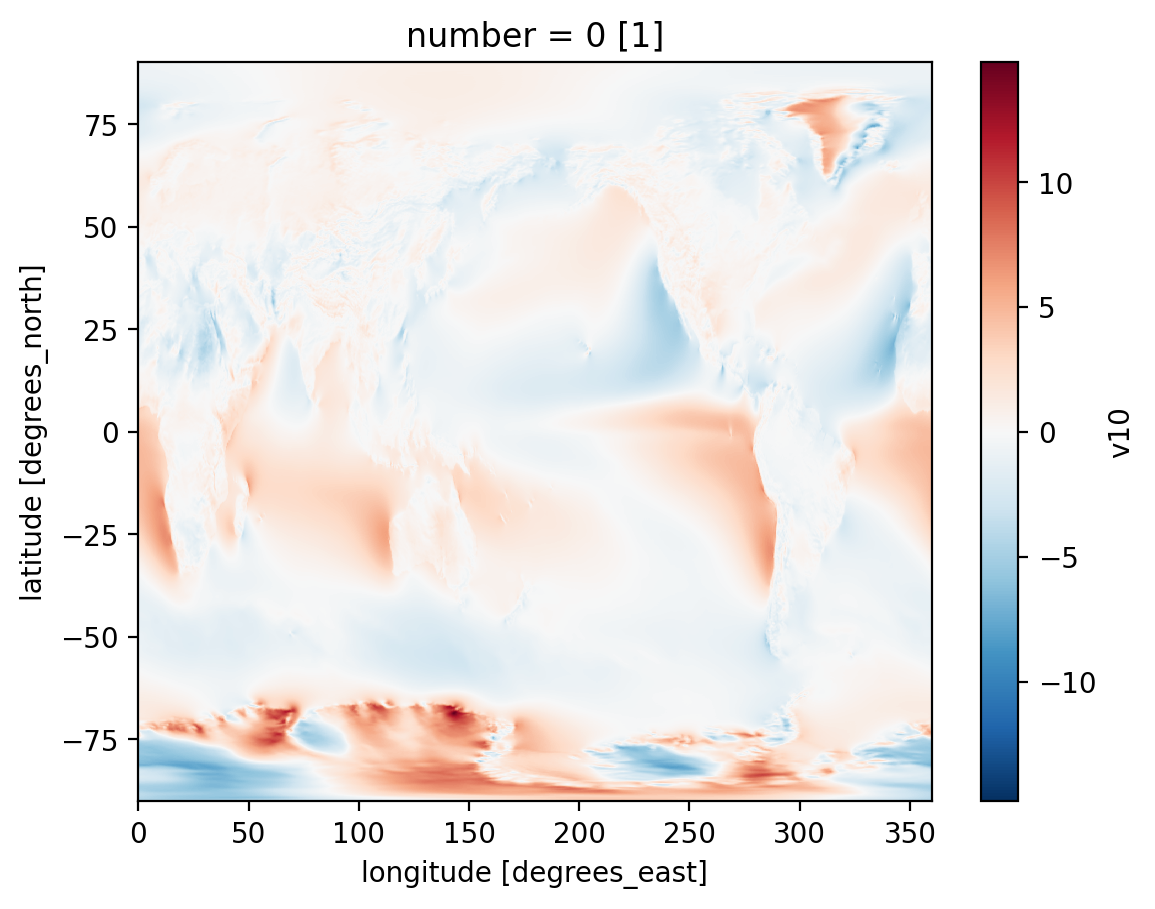

In [14]:
era5_v_ave.plot()

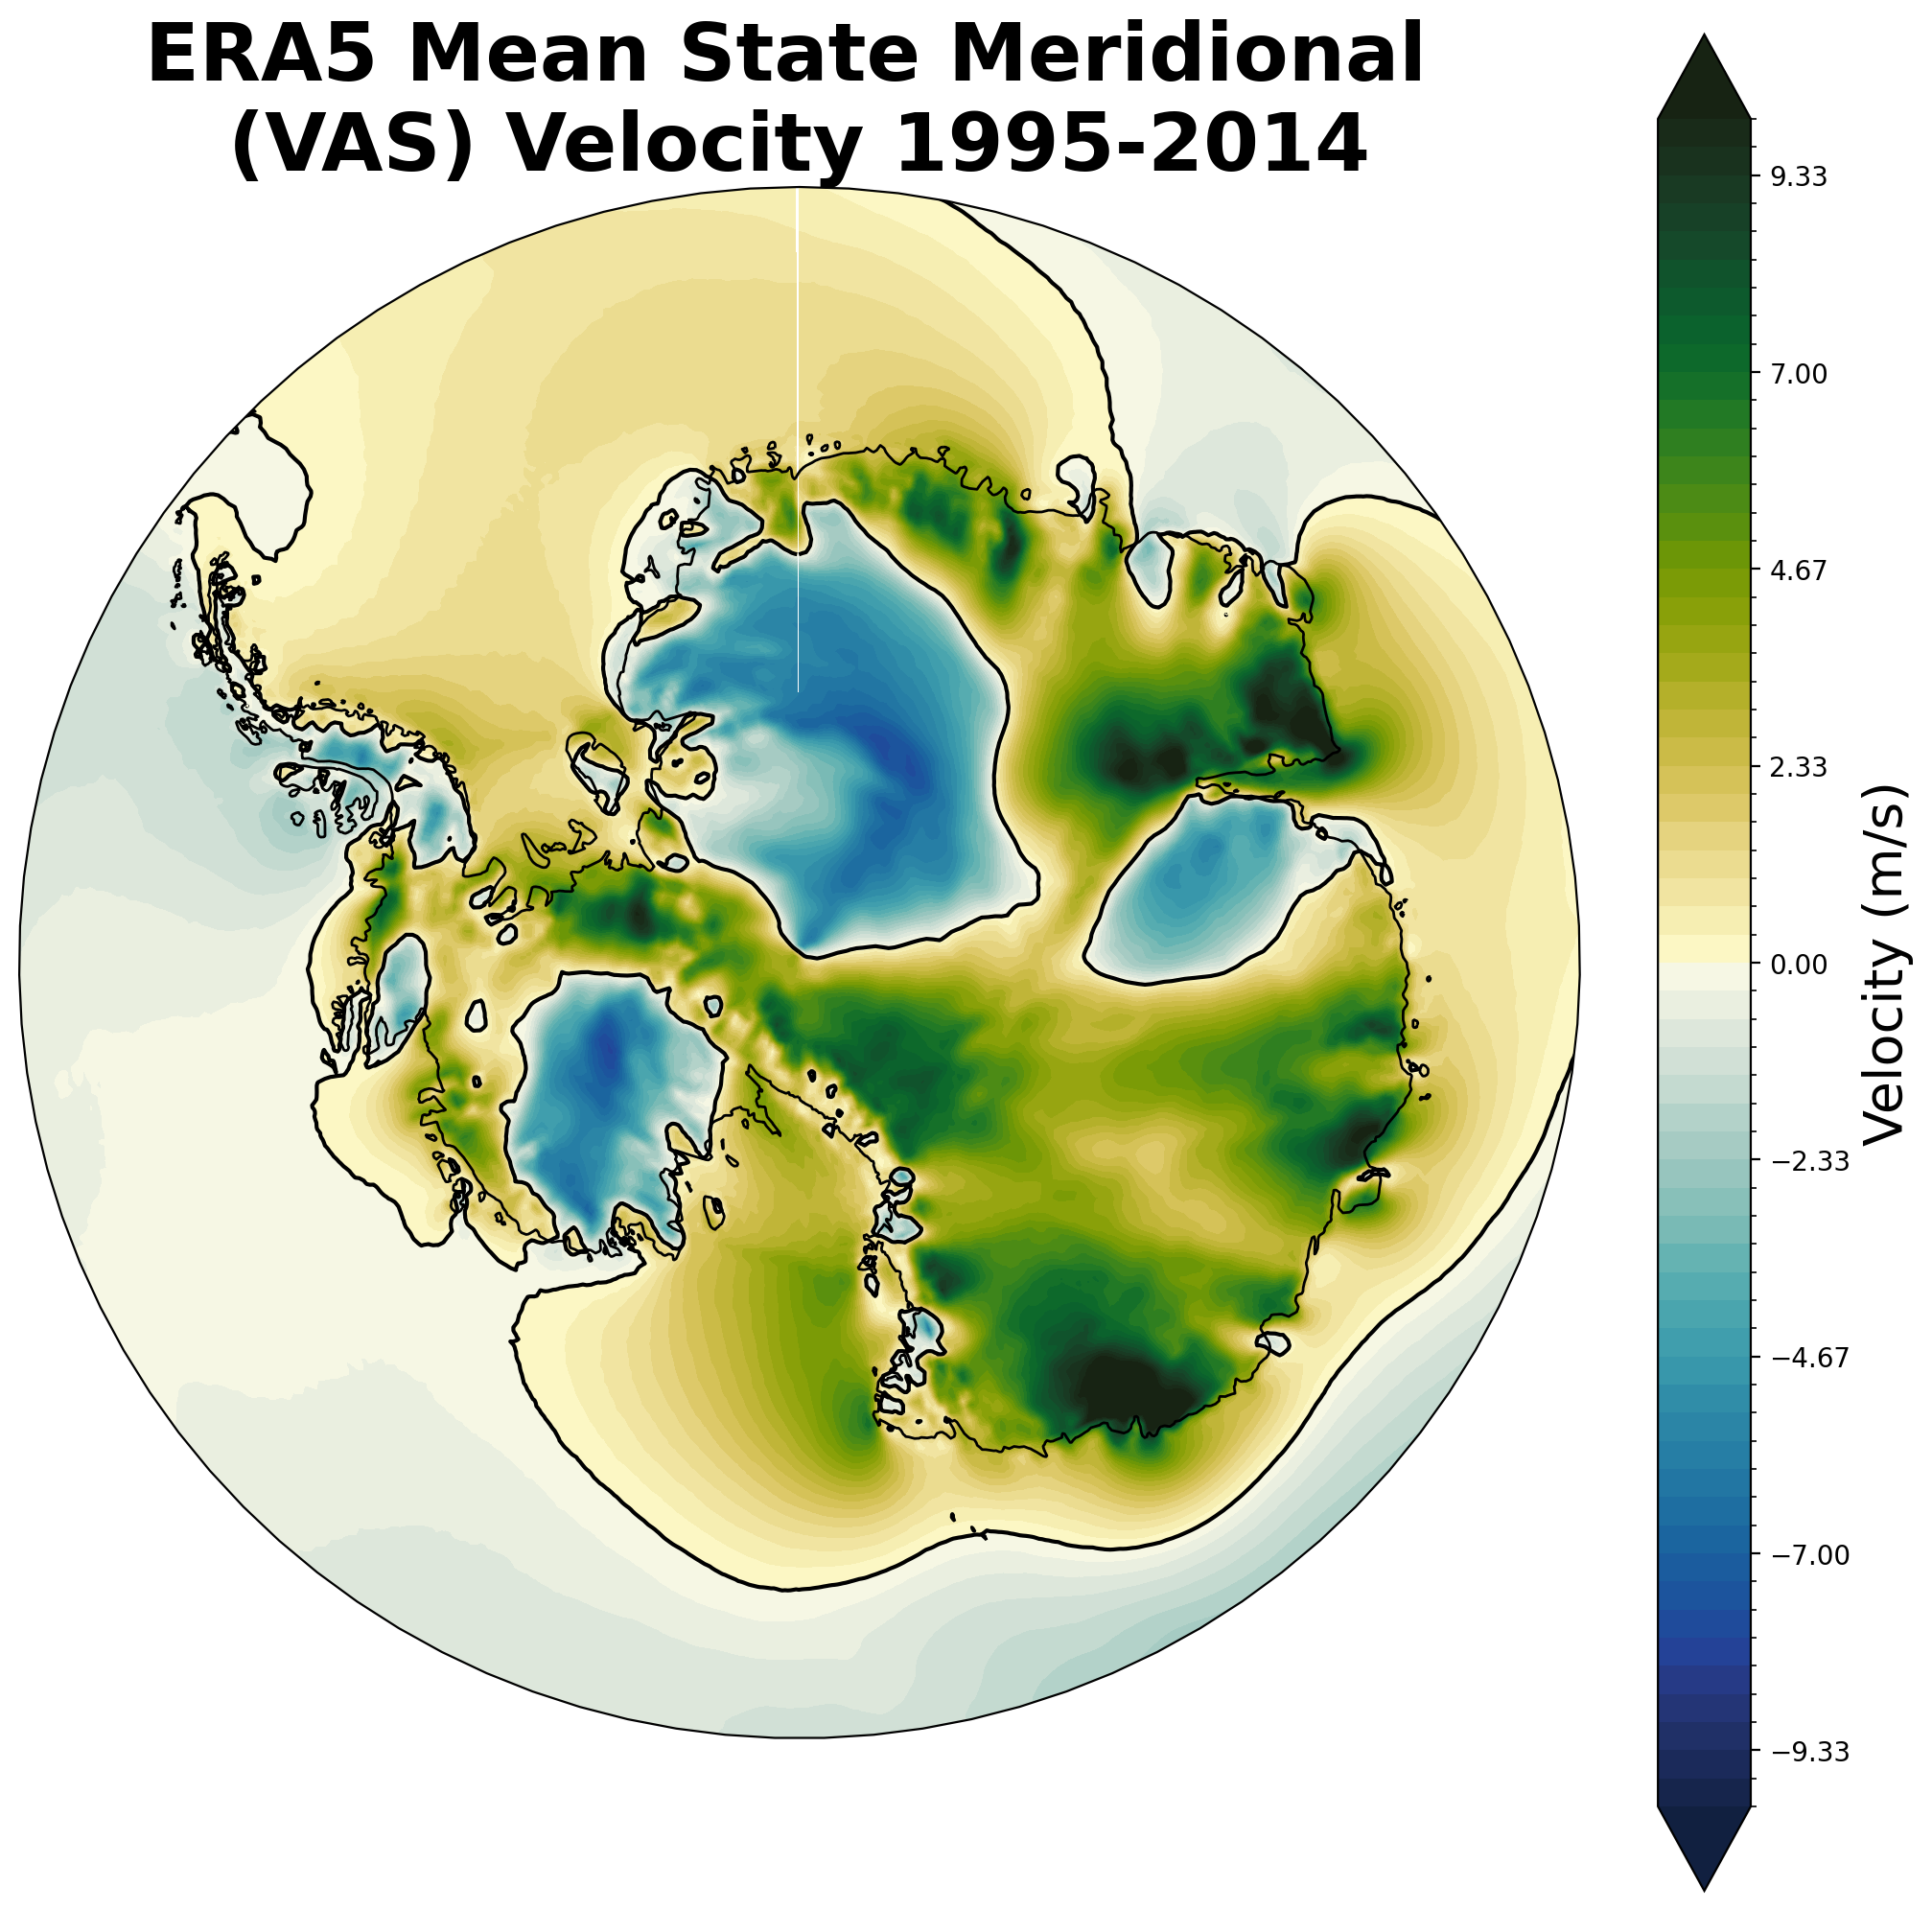

In [15]:
fig, ax = south_pole_map(rows=1, fig_size=(10, 10))

# Define the color map and levels
cmap =cmocean.cm.delta
vmin = -10
vmax = 10
levels = np.linspace(vmin, vmax, 61)  # 61 levels between vmin and vmax

p1=era5_v_ave.plot.contourf(ax=ax,
                                    transform=ccrs.PlateCarree(),
                                    vmin=vmin,
                                    vmax=vmax,
                                    levels=levels,
                                    extend='both',
                                    cmap=cmap, add_colorbar=False)

era5_v_ave.plot.contour(transform=ccrs.PlateCarree(),extend='both',levels=[0],colors='k')

# Add coastlines
ax.coastlines()

# Set titles
ax.set_title('ERA5 Mean State Meridional \n(VAS) Velocity 1995-2014', fontsize=30,fontweight='bold')

# Create a single color bar for all three subplots
cbar = fig.colorbar(p1,ax=ax, orientation='vertical', fraction=0.5, pad=0.05)
cbar.set_label('Velocity (m/s)', fontsize=20)  # Change this to your desired label

plt.show()

---